In [95]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def H_corners(filename):
    

    img = cv.imread(filename)
    img2 = cv.imread(filename)
    img3 = cv.imread(filename)
    img4 = cv.imread(filename)

    #rotate img2
    img2 = cv.rotate(img2, cv.ROTATE_90_COUNTERCLOCKWISE)
    #---------------

    #scale img3
    img3 = cv.resize(img3, (0, 0), fx=0.5, fy=0.5, interpolation=cv.INTER_AREA)
    #---------------

    #translate img4
    num_rows, num_cols = img4.shape[:2]
    translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
    num_rows=num_rows+110
    num_cols=num_cols+70
    img4 = cv.warpAffine(img4, translation_matrix, (num_cols, num_rows), borderMode=cv.BORDER_CONSTANT,
                           borderValue=(255,255,255))
    #---------------

    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    gray2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
    gray3 = cv.cvtColor(img3,cv.COLOR_BGR2GRAY)
    gray4 = cv.cvtColor(img4,cv.COLOR_BGR2GRAY)

    gray = np.float32(gray)
    gray2 = np.float32(gray2)
    gray3 = np.float32(gray3)
    gray4 = np.float32(gray4)

    dst = cv.cornerHarris(gray,2,3,0.04)
    dst2 = cv.cornerHarris(gray2,2,3,0.04)
    dst3 = cv.cornerHarris(gray3,2,3,0.04)
    dst4 = cv.cornerHarris(gray4,2,3,0.04)

    num_corners = np.sum(dst > 0.01 * dst.max())
    num_corners2 = np.sum(dst2 > 0.01 * dst2.max())
    num_corners3 = np.sum(dst3 > 0.01 * dst3.max())
    num_corners4 = np.sum(dst4 > 0.01 * dst4.max())

    #result dilated for marking corners
    dst = cv.dilate(dst,None)
    dst2 = cv.dilate(dst2,None)
    dst3 = cv.dilate(dst3,None)
    dst4 = cv.dilate(dst4,None)

    # Set threshold
    img[dst>0.01*dst.max()]=[0,0,255]
    img2[dst2>0.01*dst2.max()]=[0,0,255]
    img3[dst3>0.01*dst3.max()]=[0,0,255]
    img4[dst4>0.01*dst4.max()]=[0,0,255]
    
    #BGR to RGB to use matplotlib
    b,g,r = cv.split(img)
    rgb_img = cv.merge([r,g,b])

    b2,g2,r2 = cv.split(img2)
    rgb_img2 = cv.merge([r2,g2,b2])

    b3,g3,r3 = cv.split(img3)
    rgb_img3 = cv.merge([r3,g3,b3])

    b4,g4,r4 = cv.split(img4)
    rgb_img4 = cv.merge([r4,g4,b4])

    fig = plt.figure()
    ax1 = fig.add_subplot(2,2,1)
    ax1.set_title("Normal")
    ax1.imshow(rgb_img)
    ax2 = fig.add_subplot(2,2,2)
    ax2.set_title("Rotated")
    ax2.imshow(rgb_img2)
    ax3 = fig.add_subplot(2,2,3)
    ax3.set_title("Scaled")
    ax3.imshow(rgb_img3)
    ax4 = fig.add_subplot(2,2,4)
    ax4.set_title("Translated")
    ax4.imshow(rgb_img4)

    plt.show()
    print("The number of Harris corners in the Normal image is:", num_corners)
    print("The number of Harris corners in the Rotated image is:", num_corners2)
    print("The number of Harris corners in the 1/2 Scaled image is:", num_corners3)
    print("The number of Harris corners in the Translated image is:", num_corners4)


def H_corners2(filename):


    img = cv.imread(filename)
    img2 = cv.imread(filename)
    img3 = cv.imread(filename)
    img4 = cv.imread(filename)
    img5 = cv.imread(filename)

    #Brighten img2
    hsv2 = cv.cvtColor(img2, cv.COLOR_BGR2HSV)
    h2, s2, v2 = cv.split(hsv2)
    v2 = cv.add(v2,30)
    hsv2 = cv.merge((h2, s2, v2))
    img2 = cv.cvtColor(hsv2, cv.COLOR_HSV2BGR)
    #---------------
    #Darken img3
    hsv3 = cv.cvtColor(img3, cv.COLOR_BGR2HSV)
    h3, s3, v3 = cv.split(hsv3)
    v3 = cv.add(v3,-30)
    hsv3 = cv.merge((h3, s3, v3))
    img3 = cv.cvtColor(hsv3, cv.COLOR_HSV2BGR)
    #---------------

    #sharpen img4
    filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img4=cv.filter2D(img4,-1,filter)
    #---------------
    
     #sharpen img5
    filter = np.array([[-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, 25, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1]])
    img5=cv.filter2D(img5,-1,filter)
    #---------------

    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    gray2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
    gray3 = cv.cvtColor(img3,cv.COLOR_BGR2GRAY)
    gray4 = cv.cvtColor(img4,cv.COLOR_BGR2GRAY)
    gray5 = cv.cvtColor(img5,cv.COLOR_BGR2GRAY)

    gray = np.float32(gray)
    gray2 = np.float32(gray2)
    gray3 = np.float32(gray3)
    gray4 = np.float32(gray4)
    gray5 = np.float32(gray5)

    dst = cv.cornerHarris(gray,2,3,0.04)
    dst2 = cv.cornerHarris(gray2,2,3,0.04)
    dst3 = cv.cornerHarris(gray3,2,3,0.04)
    dst4 = cv.cornerHarris(gray4,2,3,0.04)
    dst5 = cv.cornerHarris(gray5,2,3,0.04)

    num_corners = np.sum(dst > 0.01 * dst.max())
    num_corners2 = np.sum(dst2 > 0.01 * dst2.max())
    num_corners3 = np.sum(dst3 > 0.01 * dst3.max())
    num_corners4 = np.sum(dst4 > 0.01 * dst4.max())
    num_corners5 = np.sum(dst5 > 0.01 * dst5.max())

    #dilated for marking corners
    dst = cv.dilate(dst,None)
    dst2 = cv.dilate(dst2,None)
    dst3 = cv.dilate(dst3,None)
    dst4 = cv.dilate(dst4,None)
    dst5 = cv.dilate(dst5,None)

    #Threshould
    img[dst>0.01*dst.max()]=[0,0,255]
    img2[dst2>0.01*dst2.max()]=[0,0,255]
    img3[dst3>0.01*dst3.max()]=[0,0,255]
    img4[dst4>0.01*dst4.max()]=[0,0,255]
    img5[dst5>0.01*dst5.max()]=[0,0,255]
    
    #BGR to RGB
    b,g,r = cv.split(img)
    rgb_img = cv.merge([r,g,b])

    b2,g2,r2 = cv.split(img2)
    rgb_img2 = cv.merge([r2,g2,b2])

    b3,g3,r3 = cv.split(img3)
    rgb_img3 = cv.merge([r3,g3,b3])

    b4,g4,r4 = cv.split(img4)
    rgb_img4 = cv.merge([r4,g4,b4])
    
    b5,g5,r5 = cv.split(img5)
    rgb_img5 = cv.merge([r5,g5,b5])

    fig = plt.figure()
    ax1 = fig.add_subplot(3,2,1)
    ax1.set_title("Normal")
    ax1.imshow(rgb_img)
    ax2 = fig.add_subplot(3,2,2)
    ax2.set_title("Brighten")
    ax2.imshow(rgb_img2)
    ax3 = fig.add_subplot(3,2,3)
    ax3.set_title("Darkened")
    ax3.imshow(rgb_img3)
    ax4 = fig.add_subplot(3,2,4)
    ax4.set_title("Sharpened 3*3")
    ax4.imshow(rgb_img4)
    ax5 = fig.add_subplot(3,2,5)
    ax5.set_title("Sharpened 5*5")
    ax5.imshow(rgb_img5)

    plt.show()
    print("The number of Harris corners in the Normal image is:", num_corners)
    print("The number of Harris corners in the Brightened image is:", num_corners2)
    print("The number of Harris corners in the Darkened image is:", num_corners3)
    print("The number of Harris corners in the Sharpened image with a 3*3 kernel is:", num_corners4)
    print("The number of Harris corners in the Sharpened image with a 5*5 kernel is:", num_corners5)
    

    


def H_corners3():
    img = np.zeros((600, 600))
    
    mask = np.zeros(img.shape[:2], np.uint8)
    mask[200:400, 200:400] = 255
    
    img = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)
    img2 = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)
    img3 = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)
    img4 = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)
    
    
    img2 = cv.GaussianBlur(img2,(3,3),0)
    img3 = cv.GaussianBlur(img3,(5,5),0)
    img4 = cv.GaussianBlur(img4,(7,7),0)
    
    #calculate Gaussian standard deviation from kernel size
    st_dev1 = 0.3*((1-1)*0.5-1)+0.8
    st_dev2 = 0.3*((3-1)*0.5-1)+0.8
    st_dev3 = 0.3*((5-1)*0.5-1)+0.8
    st_dev4 = 0.3*((7-1)*0.5-1)+0.8
    
    #print(st_dev1)
    #print(st_dev2)
    #print(st_dev3)
    #print(st_dev4)
    
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    gray2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
    gray3 = cv.cvtColor(img3,cv.COLOR_BGR2GRAY)
    gray4 = cv.cvtColor(img4,cv.COLOR_BGR2GRAY)
    

    dst = cv.cornerHarris(gray,2,3,0.04)
    dst2 = cv.cornerHarris(gray2,2,3,0.04)
    dst3 = cv.cornerHarris(gray3,2,3,0.04)
    dst4 = cv.cornerHarris(gray4,2,3,0.04)
    

    num_corners = np.sum(dst > 0.03 * dst.max())
    num_corners2 = np.sum(dst2 > 0.03 * dst2.max())
    num_corners3 = np.sum(dst3 > 0.03 * dst3.max())
    num_corners4 = np.sum(dst4 > 0.03 * dst4.max())
    
    x,y = np.nonzero(dst > 0.03 * dst.max())
    x2,y2 = np.nonzero(dst2 > 0.03 * dst2.max())
    x3,y3 = np.nonzero(dst3 > 0.03 * dst3.max())
    x4,y4 = np.nonzero(dst4 > 0.03 * dst4.max())
    
    
    
    #round to nearest 100 to get true coords
    x_round = np.round(x,-2)
    x2_round = np.round(x2,-2)
    x3_round = np.round(x3,-2)
    x4_round = np.round(x4,-2)
    y_round = np.round(y,-2)
    y2_round = np.round(y2,-2)
    y3_round = np.round(y3,-2)
    y4_round = np.round(y4,-2)
    
    
    #find difference for x and y (between corner value and true value)
    
    x_dif = np.absolute(x-x_round)
    y_dif = np.absolute(y-y_round)
    x2_dif = np.absolute(x2-x2_round)
    y2_dif = np.absolute(y2-y2_round)
    x3_dif = np.absolute(x3-x3_round)
    y3_dif = np.absolute(y3-y3_round)
    x4_dif = np.absolute(x4-x4_round)
    y4_dif = np.absolute(y4-y4_round)
    
    
    
    #square difference for x and y
    
    x_sq = np.square(x_dif)
    y_sq = np.square(y_dif)
    x2_sq = np.square(x2_dif)
    y2_sq = np.square(y2_dif)
    x3_sq = np.square(x3_dif)
    y3_sq = np.square(y3_dif)
    x4_sq = np.square(x4_dif)
    y4_sq = np.square(y4_dif)
    
    
    
    #add squared error for x and y
    sq_err1 = np.add(x_sq, y_sq)
    sq_err2 = np.add(x2_sq, y2_sq)
    sq_err3 = np.add(x3_sq, y3_sq)
    sq_err4 = np.add(x4_sq, y4_sq)
    
    
    #calculate root mean square error
    RMSE1 = np.sqrt(np.mean(sq_err1))
    RMSE2 = np.sqrt(np.mean(sq_err2))
    RMSE3 = np.sqrt(np.mean(sq_err3))
    RMSE4 = np.sqrt(np.mean(sq_err4))
    
    #print(RMSE1)
    #print(RMSE2)
    #print(RMSE3)
    #print(RMSE4)
    
    #result is dilated for marking the corners, not important
    dst = cv.dilate(dst,None)
    dst2 = cv.dilate(dst2,None)
    dst3 = cv.dilate(dst3,None)
    dst4 = cv.dilate(dst4,None)
    

    # set threshold
    img[dst>0.03*dst.max()]=[0,0,255]
    img2[dst2>0.03*dst2.max()]=[0,0,255]
    img3[dst3>0.03*dst3.max()]=[0,0,255]
    img4[dst4>0.03*dst4.max()]=[0,0,255]
    
    
    #BGR to RGB to matplotlib

    b,g,r = cv.split(img)
    rgb_img = cv.merge([r,g,b])

    b2,g2,r2 = cv.split(img2)
    rgb_img2 = cv.merge([r2,g2,b2])

    b3,g3,r3 = cv.split(img3)
    rgb_img3 = cv.merge([r3,g3,b3])

    b4,g4,r4 = cv.split(img4)
    rgb_img4 = cv.merge([r4,g4,b4])
    
    

    fig = plt.figure()
    ax1 = fig.add_subplot(3,2,1)
    ax1.set_title("Normal")
    ax1.imshow(rgb_img)
    ax2 = fig.add_subplot(3,2,2)
    ax2.set_title("3*3 Gaussian Blur")
    ax2.imshow(rgb_img2)
    ax3 = fig.add_subplot(3,2,3)
    ax3.set_title("5*5 Gaussian Blur")
    ax3.imshow(rgb_img3)
    ax4 = fig.add_subplot(3,2,4)
    ax4.set_title("7*7 Gaussian Blur")
    ax4.imshow(rgb_img4)
    

    plt.show()
    print("The number of Harris corners in the Normal image is:", num_corners)
    print("The number of Harris corners in the Gaussian Blurred 3*3 kernel image is:", num_corners2)
    print("The number of Harris corners in the Gaussian Blurred 5*5 kernel image is:", num_corners3)
    print("The number of Harris corners in the Gaussian Blurred 7*7 kernel image is:", num_corners4)
    
    
    x_graph = [st_dev1, st_dev2, st_dev3, st_dev4]
    y_graph = [RMSE1, RMSE2, RMSE3, RMSE4]
    
    plt.plot(x_graph, y_graph)
    plt.xlabel('Gaussian Standard Deviation')
    plt.ylabel('Root Mean Squared Error')
    plt.show()
    
    
    

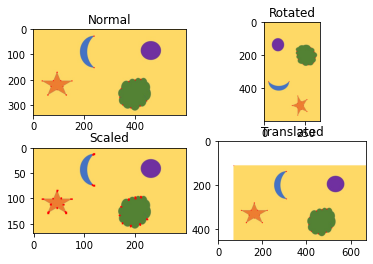

The number of Harris corners in the Normal image is: 97
The number of Harris corners in the Rotated image is: 97
The number of Harris corners in the 1/2 Scaled image is: 83
The number of Harris corners in the Translated image is: 98


In [96]:
H_corners('random-shapes-small.jpg')


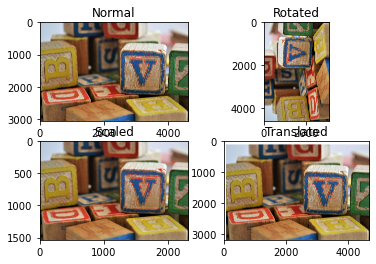

The number of Harris corners in the Normal image is: 17156
The number of Harris corners in the Rotated image is: 17153
The number of Harris corners in the 1/2 Scaled image is: 8654
The number of Harris corners in the Translated image is: 17154


In [97]:
H_corners('blocks.jpg')

When rotated, the Harris corners stay relatively the same.
When scaled to 1/2 the size, the number of Harris corners decreases.
When translated, the Harris corners stay relatively the same but may have additional corners due to the boundary.

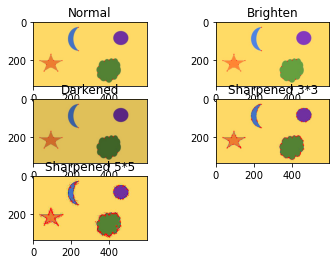

The number of Harris corners in the Normal image is: 97
The number of Harris corners in the Brightened image is: 101
The number of Harris corners in the Darkened image is: 91
The number of Harris corners in the Sharpened image with a 3*3 kernel is: 581
The number of Harris corners in the Sharpened image with a 5*5 kernel is: 1404


In [98]:
H_corners2('random-shapes-small.jpg')

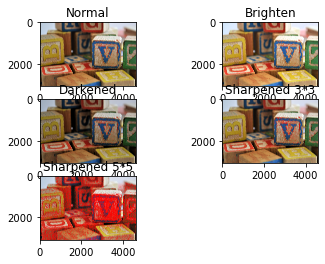

The number of Harris corners in the Normal image is: 17156
The number of Harris corners in the Brightened image is: 16004
The number of Harris corners in the Darkened image is: 20242
The number of Harris corners in the Sharpened image with a 3*3 kernel is: 61281
The number of Harris corners in the Sharpened image with a 5*5 kernel is: 1527702


In [99]:
H_corners2('blocks.jpg')

Brightening and Darkening the images changes the number of Harris Corners but not by a significant amount. The number of Harris Corners can increase or decrease in depending on the image. Sharpening with a 3 by 3 kernel increases the number of Harris Corners Significantly. Sharpening with a 5 by 5 kernel increases the number of Harris Corners by even more.

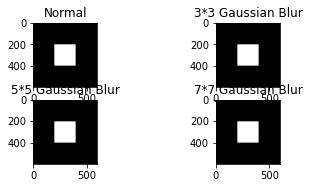

The number of Harris corners in the Normal image is: 16
The number of Harris corners in the Gaussian Blurred 3*3 kernel image is: 20
The number of Harris corners in the Gaussian Blurred 5*5 kernel image is: 24
The number of Harris corners in the Gaussian Blurred 7*7 kernel image is: 28


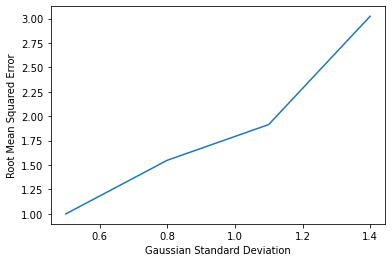

In [100]:
H_corners3()